# Capstone Project Data Wranging
## Personality and Income

Data: We all have an innate sense that personality plays a large role in our living situations. 
For example, the gender pay gap in U.S. can just as easily be explained by two of the Big 5 personality trait differences between men and women. But we focus often on things we perceive more controllable and external, like perceived injustices or ability to learn rather than working on our perceptions and personality internally. 
According to Truity’s two income attainment surveys broken down by MBTI personality typology that I already explored in Tableau, nearly every extroverted personality type tends to get paid more than introverted personality type. That is the real issue we should be focusing on. To that effect, we will explore data for India’s engineering graduate salaries that also includes information on Big 5 personality traits that are often tested in job applications. Considering that engineering students should be on a more or less equal footing at graduation, we can explore the effects of personality on income
attainment with less bias. 
Original data can be found [here](https://www.kaggle.com/manishkc06/engineering-graduate-salary-prediction).

The original data page has a data description dictionary, which I am reposting here verbatim for convenience:

### Data Description

* ID: A unique ID to identify a candidate
* Salary: Annual CTC offered to the candidate (in INR)
* Gender: Candidate's gender
* DOB: Date of birth of the candidate
* 10percentage: Overall marks obtained in grade 10 examinations
* 10board: The school board whose curriculum the candidate followed in grade 10
* 12graduation: Year of graduation - senior year high school
* 12percentage: Overall marks obtained in grade 12 examinations
* 12board: The school board whose curriculum the candidate followed
* CollegeID: Unique ID identifying the university/college which the candidate attended for her/his undergraduate
* CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.
* Degree: Degree obtained/pursued by the candidate
* Specialization: Specialization pursued by the candidate
* CollegeGPA: Aggregate GPA at graduation
* CollegeCityID: A unique ID to identify the city in which the college is located in.
* CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.
* CollegeState: Name of the state in which the college is located
* GraduationYear: Year of graduation (Bachelor's degree)
* English: Scores in AMCAT English section
* Logical: Score in AMCAT Logical ability section
* Quant: Score in AMCAT's Quantitative ability section
* Domain: Scores in AMCAT's domain module
* ComputerProgramming: Score in AMCAT's Computer programming section
* ElectronicsAndSemicon: Score in AMCAT's Electronics & Semiconductor Engineering section
* ComputerScience: Score in AMCAT's Computer Science section
* MechanicalEngg: Score in AMCAT's Mechanical Engineering section
* ElectricalEngg: Score in AMCAT's Electrical Engineering section
* TelecomEngg: Score in AMCAT's Telecommunication Engineering section
* CivilEngg: Score in AMCAT's Civil Engineering section
* conscientiousness: Scores in one of the sections of AMCAT's personality test
* agreeableness: Scores in one of the sections of AMCAT's personality test
* extraversion: Scores in one of the sections of AMCAT's personality test
* nueroticism: Scores in one of the sections of AMCAT's personality test
* openesstoexperience: Scores in one of the sections of AMCAT's personality test


In [1]:
# load all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import pandas_profiling

In [2]:
raw_file = '../data/raw/Engineering_graduate_salary.csv'

In [3]:
# there is ID column in data for index and date of birth "DOB" is the only full date column
# NAs indicated by -1
india_grads = pd.read_csv(raw_file,  index_col = 'ID', parse_dates = ['DOB'], na_values = [-1])
india_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 604399 to 993701
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Gender                 2998 non-null   object        
 1   DOB                    2998 non-null   datetime64[ns]
 2   10percentage           2998 non-null   float64       
 3   10board                2998 non-null   object        
 4   12graduation           2998 non-null   int64         
 5   12percentage           2998 non-null   float64       
 6   12board                2998 non-null   object        
 7   CollegeID              2998 non-null   int64         
 8   CollegeTier            2998 non-null   int64         
 9   Degree                 2998 non-null   object        
 10  Specialization         2998 non-null   object        
 11  collegeGPA             2998 non-null   float64       
 12  CollegeCityID          2998 non-null   int64         
 

In [4]:
india_grads.head()

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
ID,,,,,,,,,,,,,,,,,,,,,
604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,...,NaN,NaN,NaN,NaN,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,...,NaN,NaN,NaN,NaN,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,...,NaN,NaN,260.0,NaN,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,...,NaN,NaN,NaN,NaN,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,...,NaN,NaN,NaN,NaN,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [5]:
india_grads.describe().T
# we have to deal with 12graduation and GraduationYear datetime variables
# we also have to deal with variables with high missingness: Domain to CivilEngg - those are test scores

,count,mean,std,min,25%,50%,75%,max
10percentage,2998.0,77.666264,10.002785,43.000000,71.14000,78.965000,85.600000,9.776000e+01
12graduation,2998.0,2008.080720,1.631814,1998.000000,2007.00000,2008.000000,2009.000000,2.012000e+03
12percentage,2998.0,74.341061,11.120299,40.000000,66.00000,74.000000,82.600000,9.870000e+01
CollegeID,2998.0,5210.210807,4776.609877,2.000000,526.25000,4027.500000,8822.250000,1.840900e+04
CollegeTier,2998.0,1.924616,0.264053,1.000000,2.00000,2.000000,2.000000,2.000000e+00
collegeGPA,2998.0,71.509857,8.122462,6.630000,66.53000,71.800000,76.300000,9.993000e+01
CollegeCityID,2998.0,5210.210807,4776.609877,2.000000,526.25000,4027.500000,8822.250000,1.840900e+04
CollegeCityTier,2998.0,0.296197,0.456655,0.000000,0.00000,0.000000,1.000000,1.000000e+00
GraduationYear,2998.0,2011.939960,36.780582,0.000000,2012.00000,2013.000000,2014.000000,2.017000e+03
English,2998.0,501.066378,105.304512,180.000000,425.00000,500.000000,570.000000,8.750000e+02


In [6]:
# do some data cleaning
india_grads.loc[india_grads['GraduationYear'] == 0, 'GraduationYear'] = np.nan
india_grads['12graduation'] = pd.to_datetime(india_grads['12graduation'], format = '%Y').dt.year
india_grads['GraduationYear'] = pd.to_datetime(india_grads['GraduationYear'], format = '%Y').dt.year
category_vars = ['CollegeID', 'CollegeCityID', 'CollegeTier', 'CollegeCityTier', 'Gender']
india_grads[category_vars] = india_grads[category_vars].astype('category')

In [7]:
india_grads.describe().T

,count,mean,std,min,25%,50%,75%,max
10percentage,2998.0,77.666264,10.002785,43.000000,71.14000,78.965000,85.600000,9.776000e+01
12graduation,2998.0,2008.080720,1.631814,1998.000000,2007.00000,2008.000000,2009.000000,2.012000e+03
12percentage,2998.0,74.341061,11.120299,40.000000,66.00000,74.000000,82.600000,9.870000e+01
collegeGPA,2998.0,71.509857,8.122462,6.630000,66.53000,71.800000,76.300000,9.993000e+01
GraduationYear,2997.0,2012.611278,1.307539,2007.000000,2012.00000,2013.000000,2014.000000,2.017000e+03
English,2998.0,501.066378,105.304512,180.000000,425.00000,500.000000,570.000000,8.750000e+02
Logical,2998.0,500.431621,87.299850,195.000000,441.25000,505.000000,565.000000,7.950000e+02
Quant,2998.0,514.137759,122.194955,120.000000,430.00000,515.000000,595.000000,9.000000e+02
Domain,2819.0,0.604241,0.273201,0.008155,0.37606,0.635979,0.842248,9.999104e-01
ComputerProgramming,2348.0,449.553663,96.875759,105.000000,385.00000,445.000000,515.000000,8.040000e+02


In [8]:
india_grads['12graduation'].unique()

array([2009, 2010, 2007, 2008, 2005, 2006, 2003, 2002, 2004, 2012, 2011,
       2001, 1998], dtype=int64)

In [9]:
# produce html report on variables using pandas profiling module
# report not shown - indicates no correlation between Salary and any variables in the data
# indiciates relative correlations between Big 5 variables
# indicates strong correlation between geographic and temporal variables
#india_grads.profile_report()

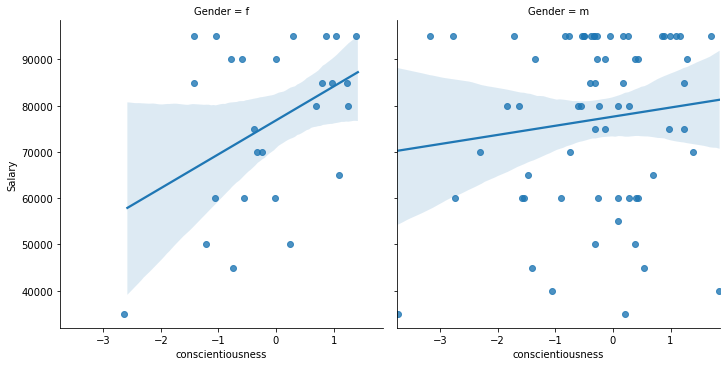

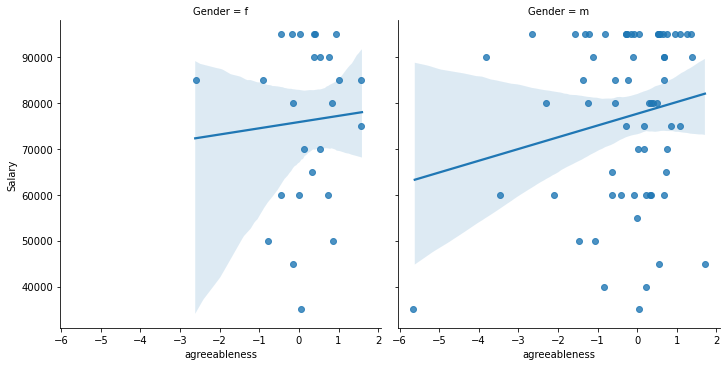

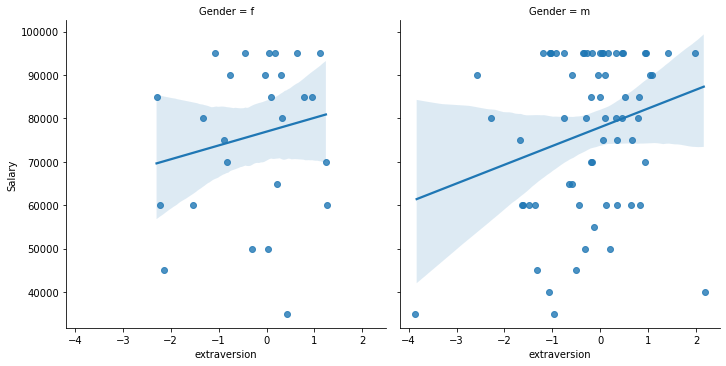

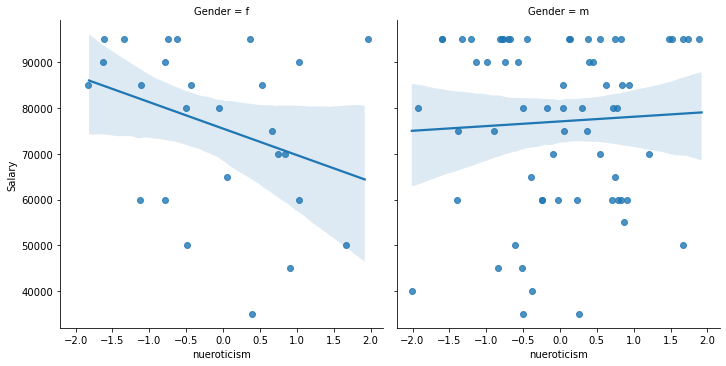

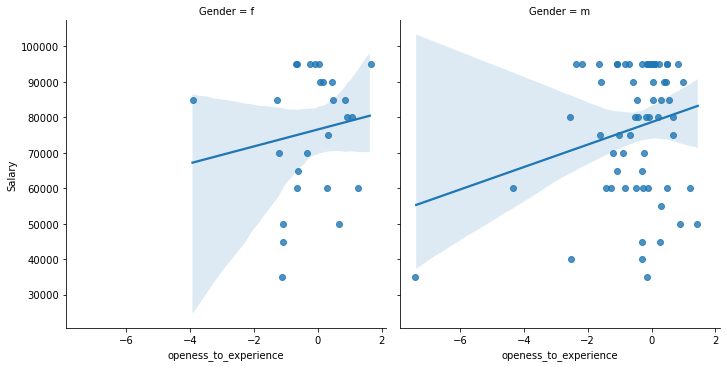

In [10]:
big5 = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience'] # neuroticism is mislabeled as nueroticism
sub = india_grads[india_grads['Salary'] < 100000] #because upper range outliers are extreme
# indicates high outliers in Salary and Big 5 variables

for facet in big5:
    sns.lmplot(x = facet, y = 'Salary', data=sub, x_jitter=.05, col = 'Gender')
    plt.show()
# there is no apparent trend in the data looking at personality and Salary visually and alone
# separated by gender, conscientiousness and neuroticism show promise
# note much less extreme pesonality ranges in women vs men - this could be due to significantly less women in the data

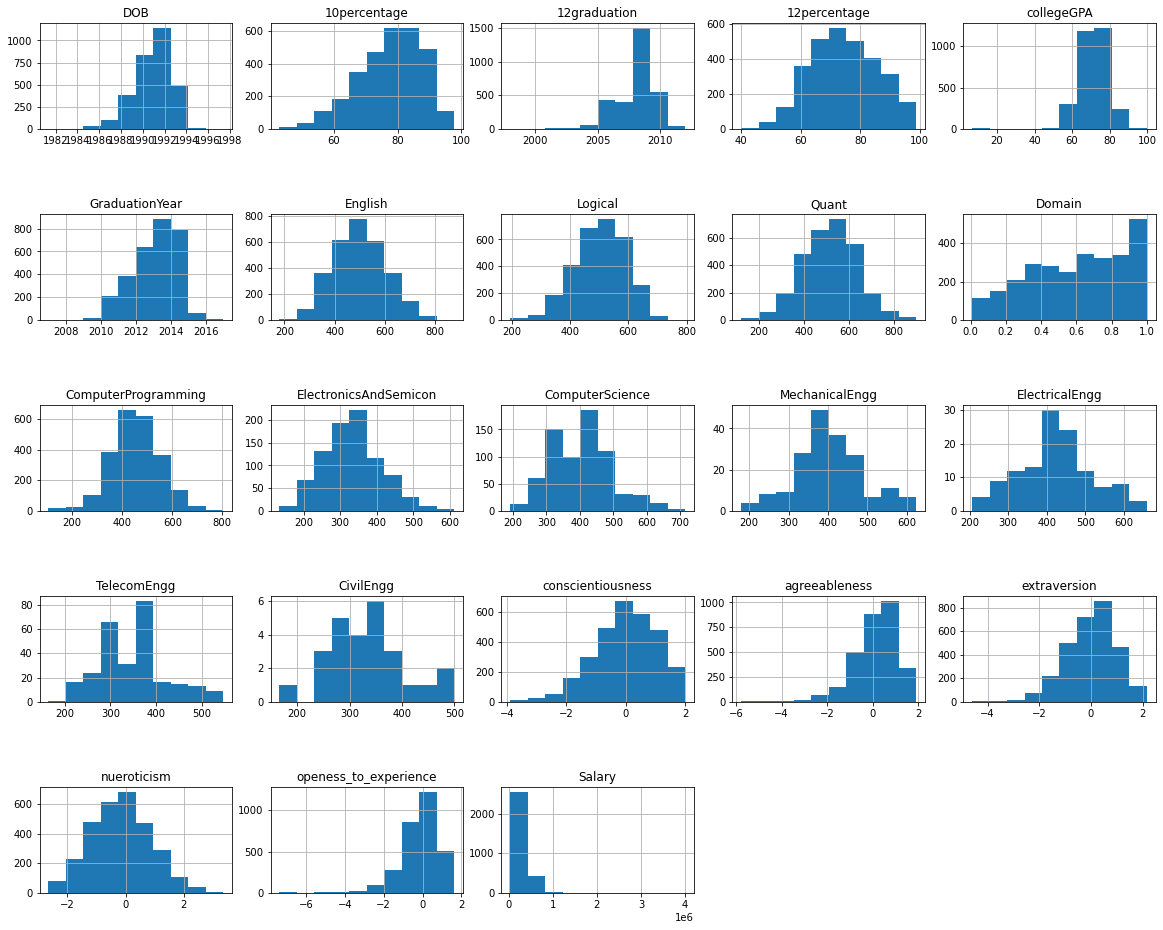

In [11]:
india_grads.hist(figsize = (20, 16))
plt.subplots_adjust(hspace=0.8, wspace=0.2);

While we can see that some of the variables have a high level of outliers, including our main Big 5 variables and Salary, I am hesitant to deal with them now before EDA.

Instead, we will deal with high-missingness variables and high-cardinality variables. Those are some of the specialized test scores in the data and geographical data.
We will deal with missing variables first by assuming that no test score means a student hasn't taken that particular test and code a numerical 0-1 variable for each.

In [12]:
missing1 = india_grads.loc[:,'ComputerProgramming':'CivilEngg']

In [13]:
missing1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 604399 to 993701
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ComputerProgramming    2348 non-null   float64
 1   ElectronicsAndSemicon  865 non-null    float64
 2   ComputerScience        700 non-null    float64
 3   MechanicalEngg         187 non-null    float64
 4   ElectricalEngg         122 non-null    float64
 5   TelecomEngg            274 non-null    float64
 6   CivilEngg              26 non-null     float64
dtypes: float64(7)
memory usage: 187.4 KB


In [14]:
missing1.describe().T

,count,mean,std,min,25%,50%,75%,max
ComputerProgramming,2348.0,449.553663,96.875759,105.0,385.0,445.0,515.0,804.0
ElectronicsAndSemicon,865.0,335.982659,80.732918,133.0,292.0,333.0,388.0,612.0
ComputerScience,700.0,406.501429,89.728704,192.0,346.0,407.0,469.0,715.0
MechanicalEngg,187.0,402.026738,85.554638,180.0,346.0,393.0,446.0,623.0
ElectricalEngg,122.0,423.336066,96.231609,206.0,356.0,420.0,473.0,660.0
TelecomEngg,274.0,349.879562,73.794414,164.0,287.5,340.0,393.0,548.0
CivilEngg,26.0,338.807692,74.635123,166.0,292.0,331.0,374.0,500.0


In [15]:
mask = np.isnan(missing1)
missing1[mask] = 0
missing1[~mask] = 1

missing1.describe().T

,count,mean,std,min,25%,50%,75%,max
ComputerProgramming,2998.0,0.783189,0.412142,0.0,1.0,1.0,1.0,1.0
ElectronicsAndSemicon,2998.0,0.288526,0.453152,0.0,0.0,0.0,1.0,1.0
ComputerScience,2998.0,0.233489,0.423121,0.0,0.0,0.0,0.0,1.0
MechanicalEngg,2998.0,0.062375,0.241876,0.0,0.0,0.0,0.0,1.0
ElectricalEngg,2998.0,0.040694,0.197613,0.0,0.0,0.0,0.0,1.0
TelecomEngg,2998.0,0.091394,0.288217,0.0,0.0,0.0,0.0,1.0
CivilEngg,2998.0,0.008672,0.092737,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:ylabel='count'>

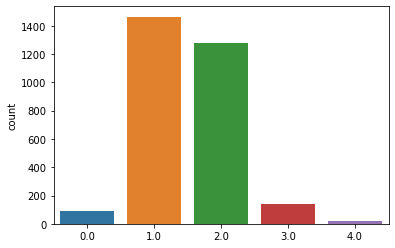

In [16]:
# majority of students took 1 to 2 specializations
sns.countplot(x = missing1.sum(axis = 1))

In [18]:
# I want to give students a score not just on specializations, but also on how well they did

missing2 = india_grads.loc[:,'ComputerProgramming':'CivilEngg']
missing2 = (missing2 - missing2.mean())/missing2.std()
missing2[np.isnan(missing2)] = 0
missing2.describe().T

,count,mean,std,min,25%,50%,75%,max
ComputerProgramming,2998.0,1.817537e-16,0.884939,-3.556655,-0.459905,0.0,0.46912,3.658772
ElectronicsAndSemicon,2998.0,4.526714e-17,0.536925,-2.514249,0.000000,0.0,0.00000,3.418895
ComputerScience,2998.0,9.091386e-18,0.482942,-2.390555,0.000000,0.0,0.00000,3.438126
MechanicalEngg,2998.0,1.879380e-17,0.249123,-2.595146,0.000000,0.0,0.00000,2.582832
ElectricalEngg,2998.0,-4.443855e-18,0.200932,-2.258469,0.000000,0.0,0.00000,2.459316
TelecomEngg,2998.0,2.599655e-17,0.301813,-2.518884,0.000000,0.0,0.00000,2.684762
CivilEngg,2998.0,-1.721994e-18,0.091333,-2.315367,0.000000,0.0,0.00000,2.159738


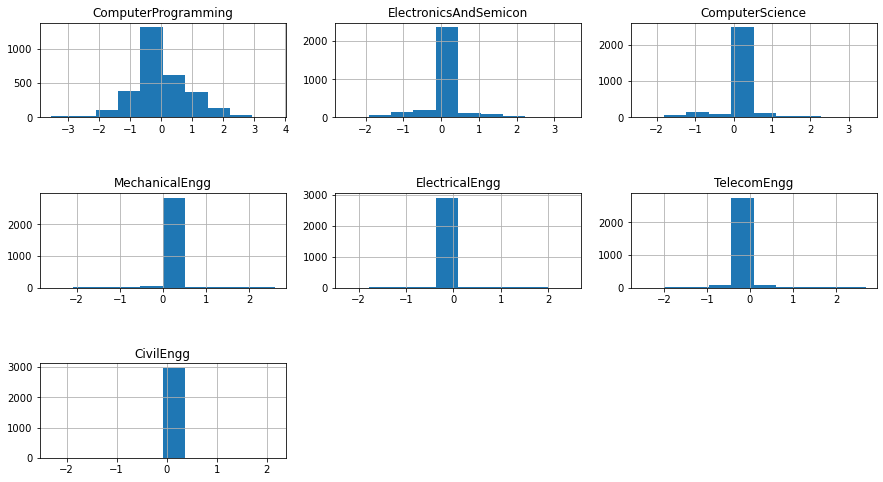

In [19]:
missing2.hist(figsize = (15,8))
plt.subplots_adjust(hspace = .8, wspace = .2)

Computer Programming looks ok, but others look terrible because of missingness. In future sections, I will have to play around with these two dataframes to see which one fits the data predictions better, but my guess is that computer programming derived from the latter combined with rowsums of the former missingness dataframe will get me the most reliable results.

In [20]:
object_dat = india_grads.select_dtypes(include='object')
object_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 604399 to 993701
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   10board         2998 non-null   object
 1   12board         2998 non-null   object
 2   Degree          2998 non-null   object
 3   Specialization  2998 non-null   object
 4   CollegeState    2998 non-null   object
dtypes: object(5)
memory usage: 205.1+ KB


In [21]:
object_dat.nunique()

10board           221
12board           277
Degree              4
Specialization     42
CollegeState       26
dtype: int64

In [22]:
object_dat['Degree'].value_counts()

B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

In [23]:
# based on above, I want to separate degree into Bachelor's and Master's
object_dat.loc[~(object_dat['Degree']=="B.Tech/B.E."), 'Degree'] = "Master"
object_dat.loc[object_dat['Degree']=="B.Tech/B.E.", 'Degree'] = "Bachelor"
object_dat['Degree'].value_counts()

C:\Users\sandr\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\sandr\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


Bachelor    2757
Master       241
Name: Degree, dtype: int64

In [24]:
object_dat['Specialization'].value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
information science engineering                 18
electronics and instrumentation engineering     18
instrumentation and control engineering         18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [25]:
object_dat['CollegeState'].value_counts()

Uttar Pradesh        698
Karnataka            281
Tamil Nadu           264
Telangana            249
Maharashtra          189
Andhra Pradesh       172
West Bengal          145
Madhya Pradesh       144
Punjab               141
Haryana              136
Orissa               130
Rajasthan            126
Delhi                122
Uttarakhand           81
Kerala                24
Jharkhand             20
Gujarat               18
Chhattisgarh          17
Himachal Pradesh      13
Bihar                  8
Union Territory        5
Assam                  5
Jammu and Kashmir      5
Sikkim                 2
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

<AxesSubplot:>

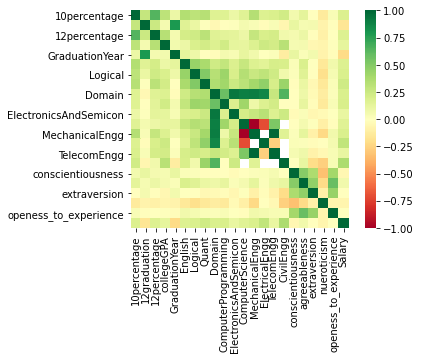

In [26]:
sns.heatmap(india_grads.corr(), square=True, cmap='RdYlGn')